In [0]:
from IPython.display import Image 
from tqdm import tqdm_notebook

In [0]:
import tensorflow as tf

tf.set_random_seed(777)  # for reproducibility

# Training Data 2dim: x1(hours), x2(attendence)
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]  
# Result Data : y(0:fail or 1:pass)
y_data = [[0], [0], [0], [1], [1], [1]]                     

# placeholders for a tensor that will be always fed.
X = tf.placeholder(tf.float32, shape=[None, 2])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([2, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Hypothesis using sigmoid: tf.div(1., 1. + tf.exp(tf.matmul(X, W)))
hypothesis = tf.sigmoid(tf.matmul(X, W) + b)

# cost/loss function
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) *
                       tf.log(1 - hypothesis))

train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

# Accuracy computation
# True if hypothesis>0.5 else False
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

In [0]:
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())

    for step in tqdm_notebook(range(10001)):
        cost_val, _ = sess.run([cost, train], feed_dict={X: x_data, Y: y_data})
        if step % 200 == 0 or step < 10 :
            print("Step : {} \t Cost : {}".format(step, cost_val))
            
    # Accuracy report
    h, c, a = sess.run([hypothesis, predicted, accuracy],
                       feed_dict={X: x_data, Y: y_data})

Step : 0 	 Cost : 1.7307828664779663
Step : 1 	 Cost : 1.7099443674087524
Step : 2 	 Cost : 1.689176082611084
Step : 3 	 Cost : 1.6684807538986206
Step : 4 	 Cost : 1.6478619575500488
Step : 5 	 Cost : 1.6273231506347656
Step : 6 	 Cost : 1.6068668365478516
Step : 7 	 Cost : 1.5864981412887573
Step : 8 	 Cost : 1.5662189722061157
Step : 9 	 Cost : 1.5460346937179565
Step : 200 	 Cost : 0.5715118050575256
Step : 400 	 Cost : 0.507413923740387
Step : 600 	 Cost : 0.47182419896125793
Step : 800 	 Cost : 0.44758477807044983
Step : 1000 	 Cost : 0.42857101559638977
Step : 1200 	 Cost : 0.41232457756996155
Step : 1400 	 Cost : 0.39775514602661133
Step : 1600 	 Cost : 0.3843379020690918
Step : 1800 	 Cost : 0.37180110812187195
Step : 2000 	 Cost : 0.35999321937561035
Step : 2200 	 Cost : 0.34882208704948425
Step : 2400 	 Cost : 0.33822622895240784
Step : 2600 	 Cost : 0.3281605541706085
Step : 2800 	 Cost : 0.31858906149864197
Step : 3000 	 Cost : 0.3094808757305145
Step : 3200 	 Cost : 0.300

In [0]:
print("# Hypothesis: \n{h} \n\n# Correct (Y): \n{c} \n\n# Accuracy: {a}".format(
    h = h, c = c, a = a
))

# Hypothesis: 
[[0.03074026]
 [0.15884683]
 [0.3048674 ]
 [0.78138196]
 [0.93957496]
 [0.9801688 ]] 

# Correct (Y): 
[[0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]] 

# Accuracy: 1.0


In [0]:
import pandas as pd

# df = pd.read_csv("./data/data-03-diabetes.csv")
df = pd.read_csv("./data/data-03-diabetes.csv", header=None)
df.head(10)

,0,1,2,3,4,5,6,7,8
0,-0.294118,0.487437,0.180328,-0.292929,0.000000,0.001490,-0.531170,-0.033333,0
1,-0.882353,-0.145729,0.081967,-0.414141,0.000000,-0.207153,-0.766866,-0.666667,1
2,-0.058824,0.839196,0.049180,0.000000,0.000000,-0.305514,-0.492741,-0.633333,0
3,-0.882353,-0.105528,0.081967,-0.535354,-0.777778,-0.162444,-0.923997,0.000000,1
4,0.000000,0.376884,-0.344262,-0.292929,-0.602837,0.284650,0.887276,-0.600000,0
5,-0.411765,0.165829,0.213115,0.000000,0.000000,-0.236960,-0.894962,-0.700000,1
6,-0.647059,-0.216080,-0.180328,-0.353535,-0.791962,-0.076006,-0.854825,-0.833333,0
7,0.176471,0.155779,0.000000,0.000000,0.000000,0.052161,-0.952178,-0.733333,1
8,-0.764706,0.979899,0.147541,-0.090909,0.283688,-0.090909,-0.931682,0.066667,0
9,-0.058824,0.256281,0.573770,0.000000,0.000000,0.000000,-0.868488,0.100000,0


In [0]:
import numpy as np
tf.set_random_seed(777)

xy=np.loadtxt('./data/data-03-diabetes.csv',delimiter=',',dtype=np.float32)
x_data=xy[:,0:-1]
y_data=xy[:,[-1]]

print('x_data.shape:{x_shape}\ny_data.shape:{y_shape}'.format(
    x_shape=x_data.shape,
    y_shape=y_data.shape))

X=tf.placeholder(tf.float32,shape=[None,8])
Y=tf.placeholder(tf.float32,shape=[None,1])

W=tf.Variable(tf.random_normal([8,1]),name='weight')
b=tf.Variable(tf.random_normal([1]),name='bias')

hypothesis=tf.sigmoid(tf.matmul(X,W)+b)

cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) *
                       tf.log(1 - hypothesis))

train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

x_data.shape:(759, 8)
y_data.shape:(759, 1)


In [0]:
print(len(xy)) 
xy[:10]

759


array([[-0.294118  ,  0.487437  ,  0.180328  , -0.292929  ,  0.        ,
         0.00149028, -0.53117   , -0.0333333 ,  0.        ],
       [-0.882353  , -0.145729  ,  0.0819672 , -0.414141  ,  0.        ,
        -0.207153  , -0.766866  , -0.666667  ,  1.        ],
       [-0.0588235 ,  0.839196  ,  0.0491803 ,  0.        ,  0.        ,
        -0.305514  , -0.492741  , -0.633333  ,  0.        ],
       [-0.882353  , -0.105528  ,  0.0819672 , -0.535354  , -0.777778  ,
        -0.162444  , -0.923997  ,  0.        ,  1.        ],
       [ 0.        ,  0.376884  , -0.344262  , -0.292929  , -0.602837  ,
         0.28465   ,  0.887276  , -0.6       ,  0.        ],
       [-0.411765  ,  0.165829  ,  0.213115  ,  0.        ,  0.        ,
        -0.23696   , -0.894962  , -0.7       ,  1.        ],
       [-0.647059  , -0.21608   , -0.180328  , -0.353535  , -0.791962  ,
        -0.0760059 , -0.854825  , -0.833333  ,  0.        ],
       [ 0.176471  ,  0.155779  ,  0.        ,  0.        ,  0

In [0]:
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())

    for step in tqdm_notebook(range(10001)):
        cost_val, _ = sess.run([cost, train], feed_dict={X: x_data, Y: y_data})       
        if step % 200 == 0 or step < 10 :
            print("Step : {} \t Cost : {}".format(step, cost_val))    

    # Accuracy report
    h, c, a = sess.run([hypothesis, predicted, accuracy],
                       feed_dict={X: x_data, Y: y_data})

Step : 0 	 Cost : 0.9742220044136047
Step : 1 	 Cost : 0.9717562198638916
Step : 2 	 Cost : 0.9693101644515991
Step : 3 	 Cost : 0.966883659362793
Step : 4 	 Cost : 0.964477002620697
Step : 5 	 Cost : 0.9620894193649292
Step : 6 	 Cost : 0.9597210884094238
Step : 7 	 Cost : 0.9573723077774048
Step : 8 	 Cost : 0.9550420045852661
Step : 9 	 Cost : 0.9527310729026794
Step : 200 	 Cost : 0.7338058352470398
Step : 400 	 Cost : 0.6805428862571716
Step : 600 	 Cost : 0.6573832035064697
Step : 800 	 Cost : 0.6405060887336731
Step : 1000 	 Cost : 0.6259894967079163
Step : 1200 	 Cost : 0.6130377650260925
Step : 1400 	 Cost : 0.601396381855011
Step : 1600 	 Cost : 0.5909146070480347
Step : 1800 	 Cost : 0.5814695358276367
Step : 2000 	 Cost : 0.5729514360427856
Step : 2200 	 Cost : 0.5652616620063782
Step : 2400 	 Cost : 0.5583115220069885
Step : 2600 	 Cost : 0.5520215034484863
Step : 2800 	 Cost : 0.5463204383850098
Step : 3000 	 Cost : 0.5411451458930969
Step : 3200 	 Cost : 0.53643953800201

In [0]:
from IPython.display import Image 
from tqdm import tqdm_notebook

In [0]:
tf.set_random_seed(777)  # for reproducibility

x_data = [[10,5], [9,5], [3,2], [2,4], [11,1]]
y_data = [[1, 0, 0], 
          [1, 0, 0], 
          [0, 1, 0], 
          [0, 1, 0],
          [0, 0, 1]]

X = tf.placeholder("float", [None, 2])
Y = tf.placeholder("float", [None, 3])
nb_classes = 3

W = tf.Variable(tf.random_normal([2, nb_classes]), name='weight')
b = tf.Variable(tf.random_normal([nb_classes]), name='bias')

# tf.nn.softmax computes softmax activations
# softmax = exp(logits) / reduce_sum(exp(logits), dim)
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

# Cross entropy cost/loss
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

In [0]:
# Launch the graph in a session.
sess = tf.Session()

# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

for step in tqdm_notebook(range(2001)):
    sess.run(optimizer, feed_dict={X: x_data, Y: y_data})
    if step % 200 == 0:
        # print(step, sess.run(cost, feed_dict={X: x_data, Y: y_data}))
        print("Step : {}, \t Cost : {}".format(step, sess.run(cost, feed_dict={X: x_data, Y: y_data})))


Step : 0, 	 Cost : 8.66186809539795
Step : 200, 	 Cost : 0.07105164229869843
Step : 400, 	 Cost : 0.04246455058455467
Step : 600, 	 Cost : 0.030498459935188293
Step : 800, 	 Cost : 0.023824427276849747
Step : 1000, 	 Cost : 0.019553374499082565
Step : 1200, 	 Cost : 0.016582565382122993
Step : 1400, 	 Cost : 0.014395907521247864
Step : 1600, 	 Cost : 0.012718920595943928
Step : 1800, 	 Cost : 0.0113918986171484
Step : 2000, 	 Cost : 0.010315677151083946



In [0]:
# Testing & One-hot encoding
test_data = [[9.5, 5.5], 
             [9.9, 1.5], 
             [3.1, 2.1]]

pred_val = sess.run(hypothesis, feed_dict={X: test_data})
pred_idx = sess.run(tf.argmax(pred_val, 1))

# print("predict value : \n {} \n\npredict index : {}".format(pred_val, pred_idx))
print("test data : {} \n\npredict value : \n {} \n\npredict index : {}".format(test_data, pred_val, pred_idx))

test data : [[9.5, 5.5], [9.9, 1.5], [3.1, 2.1]] 

predict value : 
 [[9.9201643e-01 7.8469124e-03 1.3673307e-04]
 [2.3389228e-02 3.6677935e-07 9.7661042e-01]
 [3.3346504e-02 9.6400571e-01 2.6478874e-03]] 

predict index : [0 2 1]


In [0]:
# grade로 예측값 표기
grade = ['A', 'B', 'C']
arg_val = sess.run(tf.arg_max(pred_val, 1))
p_grade = [ grade[val] for val in arg_val ]
print(p_grade)

W0911 15:02:09.453033   556 deprecation.py:323] From <ipython-input-19-93abe8ccf7f2>:3: arg_max (from tensorflow.python.ops.gen_math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.math.argmax` instead


['A', 'C', 'B']


In [0]:
tf.set_random_seed(777)  # for reproducibility

x_data = [[1, 2, 1, 1], 
          [2, 1, 3, 2], 
          [3, 1, 3, 4], 
          [4, 1, 5, 5],
          [1, 7, 5, 5], 
          [1, 2, 5, 6], 
          [1, 6, 6, 6], 
          [1, 7, 7, 7]]

y_data = [[0, 0, 1], 
          [0, 0, 1], 
          [0, 0, 1], 
          [0, 1, 0],
          [0, 1, 0], 
          [0, 1, 0], 
          [1, 0, 0], 
          [1, 0, 0]]

In [0]:
X=tf.placeholder('float',[None,4])
Y=tf.placeholder('float',[None,3])
num_class=3

W=tf.Variable(tf.random_normal([4,num_class]),name='weight')
b=tf.Variable(tf.random_normal([num_class]),name='bias')

hypothesis=tf.nn.softmax(tf.matmul(X,W)+b)

residual=tf.reduce_mean(-tf.reduce_sum(Y*tf.log(hypothesis),axis=1))

optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(residual)


In [0]:
sess=tf.Session()

sess.run(tf.global_variables_initializer())

for step in tqdm_notebook(range(2001)):
    sess.run(optimizer,feed_dict={X:x_data,Y:y_data})
    if step%200==0:
        print('step:{},\t Residual:{}'.format(step,sess.run(residual,feed_dict={X:x_data,Y:y_data})))

step:0,	 Residual:4.247129917144775
step:200,	 Residual:0.6565932035446167
step:400,	 Residual:0.548937976360321
step:600,	 Residual:0.45601433515548706
step:800,	 Residual:0.36577659845352173
step:1000,	 Residual:0.27712514996528625
step:1200,	 Residual:0.23041975498199463
step:1400,	 Residual:0.20951375365257263
step:1600,	 Residual:0.19194172322750092
step:1800,	 Residual:0.1769760549068451
step:2000,	 Residual:0.16408826410770416



In [0]:
a=sess.run(hypothesis,feed_dict={X:[[1,10,7,9]]})
print(a,'\n예측값:',sess.run(tf.arg_max(a,1)))

[[2.6199108e-02 9.7379702e-01 3.8302364e-06]] 
예측값: [1]


In [0]:
all=sess.run(hypothesis,feed_dict={X: [[1, 11, 7, 9], [1, 3, 4, 3], [1, 1, 0, 1]]})
print(all,'\n\n예측값:',sess.run(tf.arg_max(all,0)))

[[1.8846055e-02 9.8114383e-01 1.0127718e-05]
 [7.4544132e-01 2.3097898e-01 2.3579668e-02]
 [1.9645878e-08 4.0119045e-04 9.9959880e-01]] 

예측값: [1 0 2]


In [0]:
# ?tf.arg_max

In [0]:
tf.set_random_seed(777)  # for reproducibility

# Predicting animal type based on various features
xy = np.loadtxt('./data/data-04-zoo.csv', delimiter=',', dtype=np.float32)

x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

print(x_data.shape, y_data.shape)
print('\nx_data :\n', x_data)
print('\ny_data :\n', y_data)

ValueError: could not convert string to float: '"1'

In [0]:
tf.set_random_seed(777)  # for reproducibility

learning_rate = 0.15

x_data = [[1, 2, 1], [1, 3, 2], [1, 3, 4], [1, 5, 5], [1, 7, 5], [1, 2, 5], [1, 6, 6], [1, 7, 7]]
y_data = [[0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 1, 0], [0, 1, 0], [0, 1, 0], [1, 0, 0], [1, 0, 0]]

# Evaluation our model using this test dataset
x_test = [[2, 1, 1], [3, 1, 2], [3, 3, 4]]
y_test = [[0, 0, 1], [0, 0, 1], [0, 0, 1]]

X = tf.placeholder("float", [None, 3])
Y = tf.placeholder("float", [None, 3])

W = tf.Variable(tf.random_normal([3, 3]))
b = tf.Variable(tf.random_normal([3]))

# tf.nn.softmax computes softmax activations
# softmax = exp(logits) / reduce_sum(exp(logits), dim)
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

# Cross entropy cost/loss
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))

# Try to change learning_rate to small numbers
optimizer = tf.train.GradientDescentOptimizer(
    learning_rate=learning_rate).minimize(cost)

# Correct prediction Test model
prediction = tf.arg_max(hypothesis, 1)
is_correct = tf.equal(prediction, tf.arg_max(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

In [0]:
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())

    for step in range(201):
        cost_val, W_val, _ = sess.run(
            [cost, W, optimizer], feed_dict={X: x_data, Y: y_data})
        if step%20 == 0:
            print("\n Step : {} \n Cost : {} \n Weight : \n{}".format(step, cost_val, W_val))

    print("-"*60)
    # predict
    print("Prediction \t:", sess.run(prediction, feed_dict={X: x_test}))
    # Calculate the accuracy
    print("Accuracy \t: ", sess.run(accuracy, feed_dict={X: x_test, Y: y_test}))


 Step : 0 
 Cost : 4.835550308227539 
 Weight : 
[[-0.29120854 -1.0273964  -0.6278277 ]
 [-0.2736861   0.61540115  1.3385837 ]
 [-0.23703834 -0.23577206 -1.2607799 ]]

 Step : 20 
 Cost : 1.2643407583236694 
 Weight : 
[[-0.50885826 -1.1959571  -0.24161737]
 [ 0.23407257  0.37301058  1.0732157 ]
 [-0.2196734  -0.27203858 -1.2418782 ]]

 Step : 40 
 Cost : 1.1265735626220703 
 Weight : 
[[-0.726265   -1.294939    0.0747714 ]
 [ 0.40285444  0.3888592   0.8885855 ]
 [-0.314681   -0.25561792 -1.1632912 ]]

 Step : 60 
 Cost : 1.0546503067016602 
 Weight : 
[[-0.91130805 -1.3659168   0.33079237]
 [ 0.50465983  0.42624962  0.7493897 ]
 [-0.34577644 -0.26326197 -1.1245518 ]]

 Step : 80 
 Cost : 1.0138115882873535 
 Weight : 
[[-1.0738025  -1.4136807   0.541051  ]
 [ 0.56595784  0.45829177  0.65604955]
 [-0.34198976 -0.27039844 -1.1212018 ]]

 Step : 100 
 Cost : 0.9856996536254883 
 Weight : 
[[-1.2204962  -1.4438821   0.71794647]
 [ 0.602209    0.48141164  0.5966788 ]
 [-0.318734   -0.2745

In [0]:
tf.set_random_seed(777)  # for reproducibility

xy = np.array([[828.659973, 833.450012, 908100,  828.349976, 831.659973],
               [823.02002,  828.070007, 1828100, 821.655029, 828.070007],
               [819.929993, 824.400024, 1438100, 818.97998,  824.159973],
               [816,        820.958984, 1008100, 815.48999,  819.23999 ],
               [819.359985, 823,        1188100, 818.469971, 818.97998 ],
               [819,        823,        1198100, 816,        820.450012],
               [811.700012, 815.25,     1098100, 809.780029, 813.669983],
               [809.51001,  816.659973, 1398100, 804.539978, 809.559998]])
# print(xy)

x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]
print(" x_data : \n{}  \n\n y_data : \n{}".format(x_data, y_data))

# placeholders for a tensor that will be always fed.
X = tf.placeholder(tf.float32, shape=[None, 4])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([4, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Hypothesis
hypothesis = tf.matmul(X, W) + b

# Simplified cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))
## 아마도 MSE
# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)

 x_data : 
[[8.28659973e+02 8.33450012e+02 9.08100000e+05 8.28349976e+02]
 [8.23020020e+02 8.28070007e+02 1.82810000e+06 8.21655029e+02]
 [8.19929993e+02 8.24400024e+02 1.43810000e+06 8.18979980e+02]
 [8.16000000e+02 8.20958984e+02 1.00810000e+06 8.15489990e+02]
 [8.19359985e+02 8.23000000e+02 1.18810000e+06 8.18469971e+02]
 [8.19000000e+02 8.23000000e+02 1.19810000e+06 8.16000000e+02]
 [8.11700012e+02 8.15250000e+02 1.09810000e+06 8.09780029e+02]
 [8.09510010e+02 8.16659973e+02 1.39810000e+06 8.04539978e+02]]  

 y_data : 
[[831.659973]
 [828.070007]
 [824.159973]
 [819.23999 ]
 [818.97998 ]
 [820.450012]
 [813.669983]
 [809.559998]]


In [0]:
def MinMaxScaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    print(" max.data :\n {max}, \n\n min.data :\n {min}, \n\n numerator :\n {numerator}, \n\n denominator :\n {denominator} \n".format(
            max = np.max(data, 0), 
            min = np.min(data, 0),
            numerator = numerator,
            denominator = denominator
        ))
    
    return numerator/(denominator+1e-5)

In [0]:
xy = np.array([[828.659973, 833.450012, 908100,  828.349976, 831.659973],
               [823.02002,  828.070007, 1828100, 821.655029, 828.070007],
               [819.929993, 824.400024, 1438100, 818.97998,  824.159973],
               [816,        820.958984, 1008100, 815.48999,  819.23999 ],
               [819.359985, 823,        1188100, 818.469971, 818.97998 ],
               [819,        823,        1198100, 816,        820.450012],
               [811.700012, 815.25,     1098100, 809.780029, 813.669983],
               [809.51001,  816.659973, 1398100, 804.539978, 809.559998]])

# print("np.max(xy, 0) :", np.max(xy, 0))
# print("np.min(xy, 0) :", np.min(xy, 0))

# very important. It does not work without it.
xy = MinMaxScaler(xy)
print(" xy : MinMaxScaler(xy) = numerator / (denominator + 1e-7) \n", xy)

x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]
print("\n x_data : \n{}  \n\n y_data : \n{}".format(x_data, y_data))

# placeholders for a tensor that will be always fed.
X = tf.placeholder(tf.float32, shape=[None, 4])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([4, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Hypothesis
hypothesis = tf.matmul(X, W) + b

# Simplified cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

 max.data :
 [8.28659973e+02 8.33450012e+02 1.82810000e+06 8.28349976e+02
 8.31659973e+02], 

 min.data :
 [8.09510010e+02 8.15250000e+02 9.08100000e+05 8.04539978e+02
 8.09559998e+02], 

 numerator :
 [[1.9149963e+01 1.8200012e+01 0.0000000e+00 2.3809998e+01 2.2099975e+01]
 [1.3510010e+01 1.2820007e+01 9.2000000e+05 1.7115051e+01 1.8510009e+01]
 [1.0419983e+01 9.1500240e+00 5.3000000e+05 1.4440002e+01 1.4599975e+01]
 [6.4899900e+00 5.7089840e+00 1.0000000e+05 1.0950012e+01 9.6799920e+00]
 [9.8499750e+00 7.7500000e+00 2.8000000e+05 1.3929993e+01 9.4199820e+00]
 [9.4899900e+00 7.7500000e+00 2.9000000e+05 1.1460022e+01 1.0890014e+01]
 [2.1900020e+00 0.0000000e+00 1.9000000e+05 5.2400510e+00 4.1099850e+00]
 [0.0000000e+00 1.4099730e+00 4.9000000e+05 0.0000000e+00 0.0000000e+00]], 

 denominator :
 [1.9149963e+01 1.8200012e+01 9.2000000e+05 2.3809998e+01 2.2099975e+01] 

 xy : MinMaxScaler(xy) = numerator / (denominator + 1e-7) 
 [[0.99999948 0.99999945 0.         0.99999958 0.99999955]
 [

In [0]:
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

prev_cost = 1
for step in tqdm_notebook(range(1001)):
    cost_val, hy_val, _ = sess.run(
        [cost, hypothesis, train], feed_dict={X: x_data, Y: y_data})
    
    if step%10 == 0:
        # print("\nStep", step, "\nCost:", cost_val, "\nPrediction:\n", hy_val)
        # print("Step : {}, \t Cost : {}".format(step, cost_val))
        improvement =  prev_cost - cost_val
        prev_cost = cost_val
        print("Step : {}, \t Cost : {}, \t Improvement : {}".format(step, cost_val,  improvement))

Step : 0, 	 Cost : 0.8088023662567139, 	 Improvement : 0.19119763374328613
Step : 10, 	 Cost : 0.5233097076416016, 	 Improvement : 0.2854926586151123
Step : 20, 	 Cost : 0.384808212518692, 	 Improvement : 0.13850149512290955
Step : 30, 	 Cost : 0.3141460418701172, 	 Improvement : 0.07066217064857483
Step : 40, 	 Cost : 0.2750004827976227, 	 Improvement : 0.03914555907249451
Step : 50, 	 Cost : 0.2506903409957886, 	 Improvement : 0.024310141801834106
Step : 60, 	 Cost : 0.23354288935661316, 	 Improvement : 0.017147451639175415
Step : 70, 	 Cost : 0.2200181484222412, 	 Improvement : 0.013524740934371948
Step : 80, 	 Cost : 0.20847222208976746, 	 Improvement : 0.011545926332473755
Step : 90, 	 Cost : 0.1981322169303894, 	 Improvement : 0.010340005159378052
Step : 100, 	 Cost : 0.18862590193748474, 	 Improvement : 0.009506314992904663
Step : 110, 	 Cost : 0.17976579070091248, 	 Improvement : 0.008860111236572266
Step : 120, 	 Cost : 0.1714499294757843, 	 Improvement : 0.008315861225128174


In [0]:
import tensorflow as tf
import random
import matplotlib.pyplot as plt

tf.set_random_seed(777)  # for reproducibility

from tensorflow.examples.tutorials.mnist import input_data
# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset
# 맨처음 최초한번만 mnist 다운로딩 이후는 로컬데이터 사용
mnist = input_data.read_data_sets("data/MNIST_data/", one_hot=True)

nb_classes = 10

# MNIST data image of shape 28 * 28 = 784L
X = tf.placeholder(tf.float32, [None, 784])

# 0 - 9 digits recognition = 10 classes
Y = tf.placeholder(tf.float32, [None, nb_classes])

W = tf.Variable(tf.random_normal([784, nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes]))

# Hypothesis (using softmax)
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# Test model
is_correct = tf.equal(tf.arg_max(hypothesis, 1), tf.arg_max(Y, 1))

# Calculate accuracy
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

W0911 16:19:34.670358   556 deprecation.py:323] From <ipython-input-51-1799bf3bc983>:11: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W0911 16:19:34.672311   556 deprecation.py:323] From C:\Users\ktm\Anaconda3\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W0911 16:19:34.675241   556 deprecation.py:323] From C:\Users\ktm\Anaconda3\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\base.py:252: _internal_retry.<locals>.wrap.<locals>.wrapped_fn (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
In

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.


W0911 16:19:35.778820   556 deprecation.py:323] From C:\Users\ktm\Anaconda3\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:262: extract_images (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.


Extracting data/MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.


W0911 16:19:36.333540   556 deprecation.py:323] From C:\Users\ktm\Anaconda3\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.


Extracting data/MNIST_data/train-labels-idx1-ubyte.gz


W0911 16:19:36.340376   556 deprecation.py:323] From C:\Users\ktm\Anaconda3\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:110: dense_to_one_hot (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.one_hot on tensors.


Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting data/MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting data/MNIST_data/t10k-labels-idx1-ubyte.gz


W0911 16:19:37.071865   556 deprecation.py:323] From C:\Users\ktm\Anaconda3\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:290: DataSet.__init__ (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [0]:
mnist.train.num_examples


55000

Epoch: 0001	Cost = 2.703084164
Epoch: 0002	Cost = 1.083266017
Epoch: 0003	Cost = 0.864777951
Epoch: 0004	Cost = 0.755160964
Epoch: 0005	Cost = 0.686417291
Epoch: 0006	Cost = 0.637277948
Epoch: 0007	Cost = 0.600756288
Epoch: 0008	Cost = 0.571642067
Epoch: 0009	Cost = 0.547576313
Epoch: 0010	Cost = 0.527523152
Epoch: 0011	Cost = 0.510581802
Epoch: 0012	Cost = 0.495938012
Epoch: 0013	Cost = 0.483171073
Epoch: 0014	Cost = 0.471820109
Epoch: 0015	Cost = 0.460844356

Learning finished
----------------------------------------------------------------
Accuracy:  0.8863
Label:  [7]
Prediction:  [9]


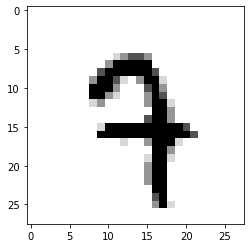

In [0]:
training_epochs = 15
batch_size = 100

with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in tqdm_notebook(range(training_epochs)):
        avg_cost = 0
        total_batch = int(mnist.train.num_examples / batch_size)

        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            c, _ = sess.run([cost, optimizer], feed_dict={
                            X: batch_xs, Y: batch_ys})
            avg_cost += c / total_batch

        # print('Epoch:', '%04d' % (epoch + 1),
        #       '\t cost =', '{:.9f}'.format(avg_cost))
        print('Epoch:', '%04d' % (epoch + 1), end='\t')
        print('Cost =', '{:.9f}'.format(avg_cost))

        
    print("Learning finished")
    print("-"*2**6)

    # Test the model using test sets
    print("Accuracy: ", accuracy.eval(session=sess, feed_dict={
          X: mnist.test.images, Y: mnist.test.labels}))

    # Get one and predict
    r = random.randint(0, mnist.test.num_examples - 1)
    print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
    print("Prediction: ", sess.run(
        tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1]}))

    plt.imshow(mnist.test.images[r:r + 1].reshape(28,28), cmap='Greys', interpolation='nearest')
    plt.show()

In [0]:
# parameters
training_epochs = 15
batch_size = 100

sess = tf.Session()
# Initialize TensorFlow variables
sess.run(tf.global_variables_initializer())
# Training cycle
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        c, _ = sess.run([cost, optimizer], feed_dict={
                        X: batch_xs, Y: batch_ys})
        avg_cost += c / total_batch
        
        if i % (total_batch/100) == 0:
            print('▒', end='')
    
    print(' 100% ')
    print('Epoch:', '%04d' % (epoch + 1), end='\t')
    print('Cost =', '{:.9f}'.format(avg_cost))

print()
print("Learning finished")

# Test the model using test sets
# print("Accuracy: ", accuracy.eval(session=sess, feed_dict={
#       X: mnist.test.images, Y: mnist.test.labels}))

▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒ 100% 
Epoch: 0001	Cost = 2.704165164
▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒ 100% 
Epoch: 0002	Cost = 1.083177220
▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒ 100% 
Epoch: 0003	Cost = 0.864493225
▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒ 100% 
Epoch: 0004	Cost = 0.755832772
▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒ 100% 
Epoch: 0005	Cost = 0.686595665
▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒ 100% 
Epoch: 0006	Cost = 0.637369337
▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒ 100% 
Epoch: 0007	Cost = 0.600485347
▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒ 100% 
Epoch: 0008	Cost = 0.571350643
▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒ 100% 
Epoch: 0009	Cost = 0.547092399
▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒ 100% 
Epoch: 0010	Cost = 0.527261881
▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒ 100% 
Epoch: 0011	Cost = 0.510780466
▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒

In [0]:
# Test the model using test sets
print("Accuracy: ", accuracy.eval(session=sess, feed_dict={
      X: mnist.test.images, Y: mnist.test.labels}))

Accuracy:  0.8874


Label:  [8]
Prediction:  [6]


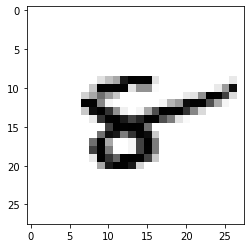

In [0]:
# Get one and predict
r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(
    tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1]}))

plt.imshow(mnist.test.images[r:r + 1].reshape(28,28), cmap='Greys', interpolation='nearest')
plt.show()

r: 1251
Label:  [2]
Prediction:  [0]


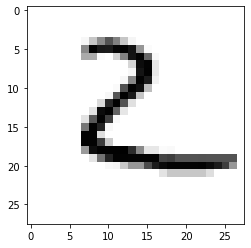

In [0]:
r = random.randint(0, mnist.test.num_examples - 1)
print("r:", r)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(
    tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1]}))

plt.imshow(mnist.test.images[r:r + 1].reshape(28,28), cmap='Greys', interpolation='nearest')
plt.show()

r: 5587
Label:  [9]
Prediction:  [9]


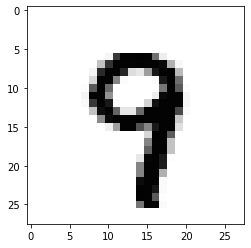

r: 7867
Label:  [9]
Prediction:  [9]


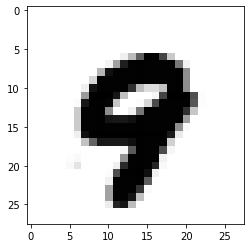

r: 8979
Label:  [1]
Prediction:  [1]


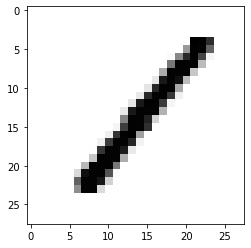

r: 190
Label:  [1]
Prediction:  [1]


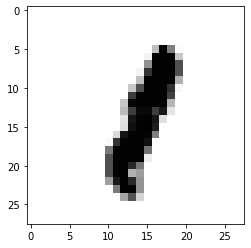

r: 8242
Label:  [8]
Prediction:  [8]


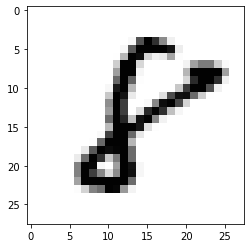

r: 5228
Label:  [6]
Prediction:  [4]


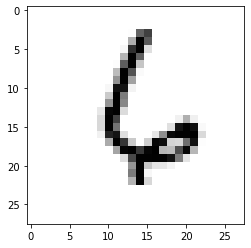

r: 1552
Label:  [4]
Prediction:  [4]


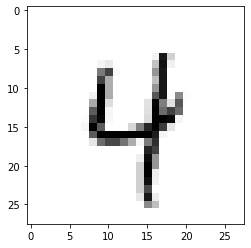

r: 7368
Label:  [0]
Prediction:  [0]


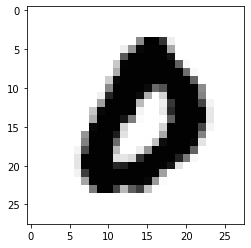

r: 25
Label:  [0]
Prediction:  [0]


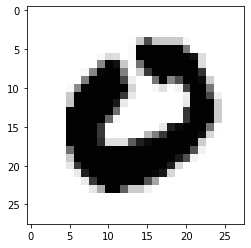

r: 2368
Label:  [4]
Prediction:  [4]


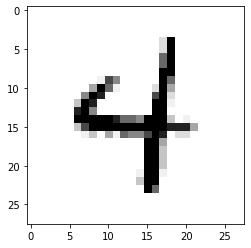

In [0]:
for i in range(10):
    # Get one and predict
    r = random.randint(0, mnist.test.num_examples - 1)
    print("r:", r)
    print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
    print("Prediction: ", sess.run(
        tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1]}))

    plt.imshow(mnist.test.images[r:r + 1].reshape(28,28), cmap='Greys', interpolation='nearest')
    plt.show()